In [1]:
cd ../TileEM/

/srv/data/home/jlee782/crowd-seg/analysis/TileEM


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from paper_visualizations import * 
from PixelEM import * 
from test_sample import test_sample_obj
import json
import pandas as pd
object_lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47]

Populating the interactive namespace from numpy and matplotlib


In [3]:
tiles = pkl.load(open("pixel_em/5workers_rand0/obj1/tiles.pkl"))

In [5]:
mega_mask = pkl.load(open("pixel_em/5workers_rand0/obj1/mega_mask.pkl"))

In [4]:
len(tiles)

565

In [76]:
mask = np.zeros_like(mega_mask)

In [11]:
mask[idx]

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]])

In [27]:
idx = np.array(tiles[300])

In [71]:
idx = np.array(list(tiles[300]))
idx2 = np.array(list(tiles[390]))

In [59]:
import numpy.ma as ma

In [78]:
base = ma.make_mask(mask)

In [79]:
base

False

In [72]:
base = ma.masked_array(idx,fill_value=0)
mx = ma.masked_array(idx,fill_value=1)
mx2 = ma.masked_array(idx2,fill_value=2)

In [125]:
np.array(list(tiles[0]))

array([[102, 595],
       [ 33, 440],
       [342, 418],
       ..., 
       [116, 548],
       [ 63, 255],
       [356,  75]])

In [127]:
ma.masked_array?

In [129]:
len(np.array(list(tiles[0])))

278070

In [133]:
mask = np.zeros_like(mega_mask)

[(102, 595),
 (33, 440),
 (342, 418),
 (273, 617),
 (381, 392),
 (418, 370),
 (444, 7),
 (5, 178),
 (247, 483),
 (30, 287),
 (265, 575),
 (242, 161),
 (189, 422),
 (228, 412),
 (122, 635),
 (468, 611),
 (214, 91),
 (454, 586),
 (290, 555),
 (184, 26),
 (94, 509),
 (424, 521),
 (276, 618),
 (170, 21),
 (479, 45),
 (373, 554),
 (209, 569),
 (119, 90),
 (156, 192),
 (449, 74),
 (195, 634),
 (89, 227),
 (75, 400),
 (421, 228),
 (114, 374),
 (167, 448),
 (460, 334),
 (354, 201),
 (407, 305),
 (446, 265),
 (181, 75),
 (86, 240),
 (17, 287),
 (56, 323),
 (402, 211),
 (351, 244),
 (267, 548),
 (28, 185),
 (360, 601),
 (14, 508),
 (307, 114),
 (53, 538),
 (346, 532),
 (240, 63),
 (293, 11),
 (187, 536),
 (39, 539),
 (226, 126),
 (173, 549),
 (61, 549),
 (212, 445),
 (200, 513),
 (198, 248),
 (51, 524),
 (117, 504),
 (154, 370),
 (463, 236),
 (193, 280),
 (140, 257),
 (433, 265),
 (179, 221),
 (472, 337),
 (112, 200),
 (59, 435),
 (98, 407),
 (151, 387),
 (444, 143),
 (391, 400),
 (84, 102),
 (3

In [145]:
i

564

In [153]:
mask = np.zeros_like(mega_mask)
for tidx in range(len(tiles)):
    for i in list(tiles[tidx]):
        mask[i]=tidx

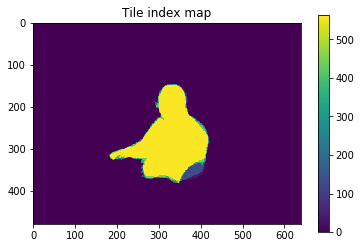

In [156]:
plt.figure()
plt.imshow(mask)
plt.title("Tile index map")
plt.colorbar()

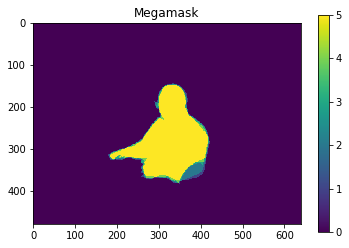

In [159]:
plt.figure()
plt.imshow(mega_mask)
plt.title("Megamask")
plt.colorbar()

In [157]:
mx = ma.masked_array(np.array(list(tiles[0])),mask=np.zeros_like(mega_mask),fill_value=0)

MaskError: Mask and data not compatible: data size is 556140, mask size is 307200.

In [126]:
mx

masked_array(data =
 [[102 595]
 [ 33 440]
 [342 418]
 ..., 
 [116 548]
 [ 63 255]
 [356  75]],
             mask =
 False,
       fill_value = 0)

In [118]:
mask = np.ma.filled(mx)

In [119]:
mask

matrix([[102, 595],
        [ 33, 440],
        [342, 418],
        ..., 
        [116, 548],
        [ 63, 255],
        [356,  75]])

In [115]:
tmp

masked_array(data =
 [[318 209]
 [318 208]],
             mask =
 False,
       fill_value = 564)

In [111]:
mx_lst=[]
for i,tidx in enumerate(tiles):
    tmp = ma.masked_array(list(tidx),fill_value=i)
    #mx = np.ma.vstack([mx,tmp])
    mx_lst.append(tmp)

In [112]:
total_mask = np.ma.vstack(mx_lst)

In [113]:
mask = np.ma.filled(total_mask)

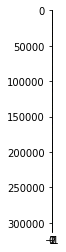

In [114]:
plt.imshow(mask)

In [101]:
total_mask = reduce(np.logical_and, mx_lst)

ValueError: operands could not be broadcast together with shapes (278070,2) (6,2) 

In [58]:
idx

array([[374, 330],
       [376, 334],
       [374, 331],
       [375, 331],
       [376, 336],
       [374, 329],
       [373, 328],
       [373, 329],
       [375, 334],
       [376, 333],
       [376, 335],
       [376, 332],
       [375, 332],
       [375, 333]])

In [57]:
mask[idx]

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]])

In [41]:
mask[[374, 330],[376, 334]]

array([ 0.,  0.])

In [6]:
i=0
for tile in tiles :
    if i==0: 
        print tile
    i+=1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
